# A brief analysis of QQ message

There was a message collector-bot developed around Oct 2017, and it started collect from 29/10/2017. 

几点结论：
- 每天11点和下午3天最活跃
- 每周三最活跃
- 林芝是一号活跃人物
- 复读机是灵芝好基友，而且压倒性优势

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
chat_file = 'data/chat_hist_20180101.csv'

In [ ]:
# read all data ignore bad lines
df = pd.read_csv(chat_file, error_bad_lines=False)

## Pre processing

In [32]:
# drop all null values
non_na_df = df.dropna()

In [34]:
# create timestamp index
index = pd.to_datetime(non_na_df['created_at'])
non_na_df.index = index

In [78]:
# overall info
print('Total records {}'.format(len(non_na_df)))
print('Start / End : {}, {}'.format(non_na_df.index.min(), non_na_df.index.max()))

Total records 65184
Start / End : 2017-10-29 06:24:45, 2017-12-31 16:51:29


In [ ]:
non_na_df['hour'] = (non_na_df.index.hour + 10) % 24
non_na_df['dayofweek'] = non_na_df.index.dayofweek

## Chat activities by hours

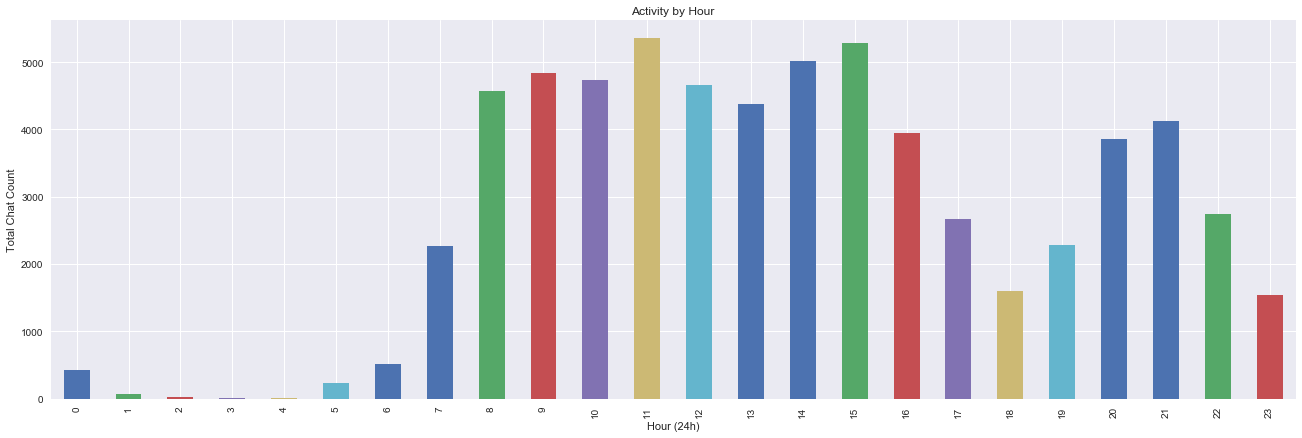

In [72]:
non_na_df.groupby('hour').count()['sender_qq'].plot(kind='bar', figsize=(18,6))
plt.tight_layout()
plt.title('Activity by aHour')
plt.ylabel('Total Chat Count')
plt.xlabel('Hour (24h)')

## Chat activities by day of week

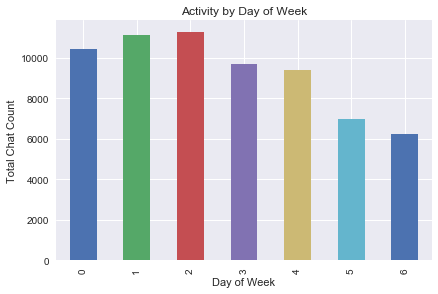

In [74]:
non_na_df.groupby('dayofweek').count()['sender_qq'].plot(kind='bar')
plt.tight_layout()
plt.title('Activity by Day of Week')
plt.ylabel('Total Chat Count')
plt.xlabel('Day of Week')

## Top chatter over time

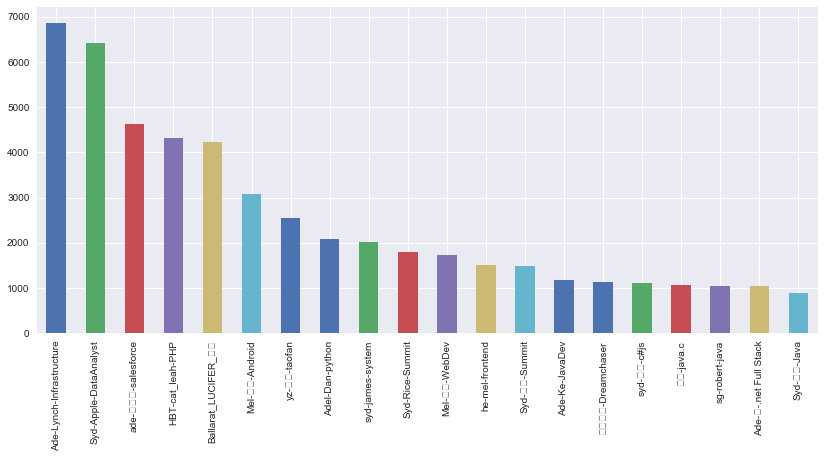

In [82]:
# top chatter over time
top_chater = non_na_df['sender_card'].value_counts()
top_chater.nlargest(20).plot(kind='bar', figsize=(14,6))

## 找到好基友...

In [83]:
# find all message with @someone
at_messages = non_na_df[non_na_df.message_text.str.startswith('@')]

In [87]:
# extract the name card from who has been mentioned
def get_atee(m):
    if m.startswith('@'):
        try:
            return m.split()[0]
        except:
            return 'N/A'
    else:
        return 'N/A'

In [ ]:
at_messages['who'] = at_messages.message_text.apply(get_atee)

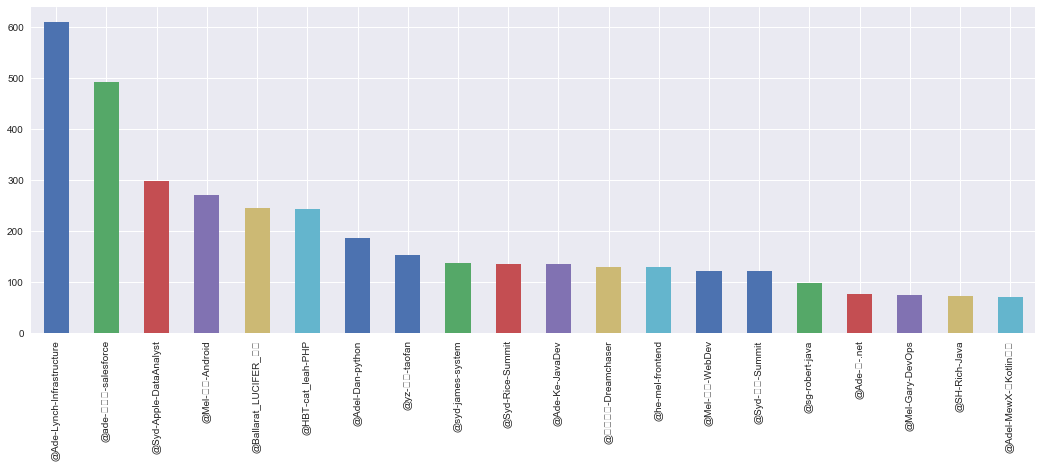

In [94]:
at_messages.who.value_counts().nlargest(20).plot(kind='bar', figsize=(18,6))

In [105]:
who_at_lynch = at_messages[at_messages['who'].str.startswith('@Ade-Lynch')]

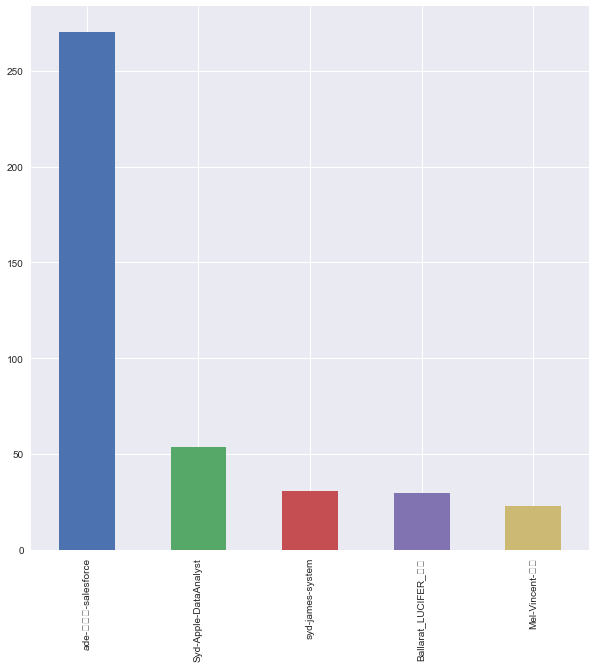

In [108]:
who_at_lynch['sender_card'].value_counts().nlargest(5).plot(kind='bar', figsize=(10,10))